In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import heapq

In [5]:
essentiality = pd.read_csv('../pangenome/Essentials2020/tnseq_processing/Essentials.csv')
essentiality_wide = essentiality.pivot_table(index = "MCL_Sub",
                                            columns = "Strain",
                                            values = "zbar")
essentiality_wide.fillna(0, inplace=True)

# load SNP distance data and filter
snpdists = pd.read_csv('./PG350_phylogenies/PG350_dists.txt', sep="\t", index_col = 0)
snpdists.rename({'PG1':'PG01', 'PG2':'PG02','PG4':'PG04','PG6':'PG06','PG9':'PG09'}, inplace=True, axis = 0)
snpdists.rename({'PG1':'PG01', 'PG2':'PG02','PG4':'PG04','PG6':'PG06','PG9':'PG09'}, inplace=True, axis = 1)

In [18]:
essentiality_wide.head()

Strain,BHN97,CT-22F,D39-AC1770,PG01,PG02,PG04,PG06,PG09,PG12,PG13,...,PG18,PG21,PG22,PG24,PG25,PG27,PG28,PG29,TIGR4-AC316,Taiwan-19F
MCL_Sub,,,,,,,,,,,,,,,,,,,,,
1000_0,0.000,0.0000,0.0006,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0007,0.0000,0.0000
1001_0,0.000,0.0000,0.0000,0.0000,0.0002,0.0000,0.0002,0.0001,0.0000,0.0000,...,0.0000,0.0000,0.0003,0.0033,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000
1002_0,1.000,0.9999,0.9999,0.9998,1.0000,1.0000,1.0000,0.9909,0.9992,1.0000,...,0.9951,0.9933,0.9878,0.9618,0.9998,0.9998,0.9994,0.9984,0.9900,0.9998
1004_0,0.989,0.9993,0.7869,1.0000,0.9980,1.0000,0.9918,0.7233,0.9612,0.9706,...,0.8629,0.8237,0.7712,0.6646,0.9958,0.9643,0.9988,0.8961,0.9925,0.9939
1005_0,0.000,0.0000,0.0000,0.0002,0.0006,0.0001,0.0001,0.0031,0.0000,0.0009,...,0.0004,0.0003,0.0012,0.0038,0.0000,0.0000,0.0000,0.0035,0.0000,0.0000


In [6]:
essentiality_wide.columns

Index(['BHN97', 'CT-22F', 'D39-AC1770', 'PG01', 'PG02', 'PG04', 'PG06', 'PG09',
       'PG12', 'PG13', 'PG15', 'PG16', 'PG18', 'PG21', 'PG22', 'PG24', 'PG25',
       'PG27', 'PG28', 'PG29', 'TIGR4-AC316', 'Taiwan-19F'],
      dtype='object', name='Strain')

In [10]:
select_strains = list(set(snpdists.columns).intersection(set(essentiality_wide.columns)))

In [15]:
snpdists_filter = snpdists.loc[select_strains, select_strains]

In [35]:
mystrain = 'PG01'
mycluster = '1004_0'
def make_prediction(mystrain,mycluster):
    mydists = snpdists_filter[mystrain]
    strainix = heapq.nsmallest(2, range(len(mydists)), key=mydists.__getitem__)[1]

    sister_strain = snpdists_filter.index[strainix]
    zbar_sister = essentiality_wide.loc[mycluster, sister_strain]
    return(zbar_sister)

In [40]:
essentiality_sub = essentiality_wide[select_strains]
essentiality_sub['MCL_Sub'] = essentiality_sub.index
essentiality_sub_long = pd.melt(essentiality_sub, id_vars = 'MCL_Sub', value_vars = select_strains)
essentiality_sub_long.shape

D:\defne\Apps\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(63716, 3)

In [42]:
essentiality_sub_long['Prediction'] = [make_prediction(essentiality_sub_long['Strain'][i], essentiality_sub_long['MCL_Sub'][i]) for i in range(essentiality_sub_long.shape[0])]

Text(0.5,0,'zbar')

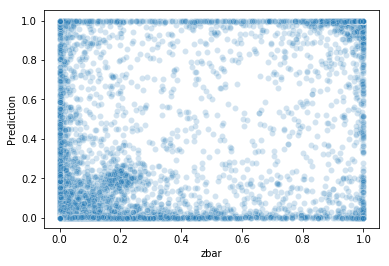

In [46]:
sns.scatterplot(data = essentiality_sub_long, x = "value", y = 'Prediction', alpha = 0.2)
plt.xlabel("zbar")

### Repeat the same thing with categorical outputs

In [48]:
categorymap = {'Essential':1, 'Non-Essential':-1, 'Uncertain':0}

essentiality_cat = essentiality.replace({'Binomial.Call':categorymap})

essentiality_wide_cat = essentiality_cat.pivot_table(index = "MCL_Sub",
                                            columns = "Strain",
                                            values = "Binomial.Call")

essentiality_wide_cat.fillna(-1, inplace=True)

essentiality_cat_sub = essentiality_wide_cat[select_strains]
essentiality_cat_sub['MCL_Sub'] = essentiality_cat_sub.index
essentiality_cat_sub_long = pd.melt(essentiality_cat_sub, id_vars = 'MCL_Sub', value_vars = select_strains)
essentiality_cat_sub_long.shape

D:\defne\Apps\Anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


(63716, 3)

In [49]:
def make_prediction_cat(mystrain,mycluster):
    mydists = snpdists_filter[mystrain]
    strainix = heapq.nsmallest(2, range(len(mydists)), key=mydists.__getitem__)[1]

    sister_strain = snpdists_filter.index[strainix]
    zbar_sister = essentiality_wide_cat.loc[mycluster, sister_strain]
    return(zbar_sister)

In [50]:
essentiality_cat_sub_long['Prediction'] = [make_prediction_cat(essentiality_cat_sub_long['Strain'][i], essentiality_cat_sub_long['MCL_Sub'][i]) for i in range(essentiality_cat_sub_long.shape[0])]

In [51]:
from sklearn.metrics import confusion_matrix

In [63]:
categorymap_rev = {1: 'Essential',-0.5:'Non-Essential', -1: 'Non-Essential', 0:'Uncertain'}
essentiality_cat_sub_long = essentiality_cat_sub_long.replace({'value':categorymap_rev,
                                                              'Prediction':categorymap_rev})


cm = confusion_matrix(y_true = essentiality_cat_sub_long['value'], y_pred = essentiality_cat_sub_long['Prediction'], 
                labels = ['Essential', 'Non-Essential', 'Uncertain'])

In [66]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[ 4384   139   366]
 [  184 52494  1581]
 [  727  1930  1911]]


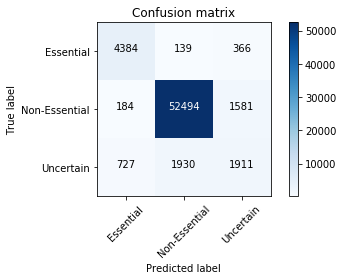

In [85]:
plot_confusion_matrix(cm, ['Essential', 'Non-Essential', 'Uncertain'])
plt.savefig('Aim1c_cm.svg')

In [83]:
essentiality_wide_cat['sum'] = essentiality_wide_cat[select_strains].sum(axis = 1)
print('Number of essentials:',sum(essentiality_wide_cat['sum']==17))
print('Number of non-essentials:',sum(essentiality_wide_cat['sum']==-17))

Number of essentials: 101
Number of non-essentials: 2122


In [84]:
101*17 + 2122*17

37791